<a href="https://colab.research.google.com/github/Devarsh-Patel/CECS-456-Machine-Learning-Project/blob/main/animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Get dataset from an account. 

In [ ]:
! kaggle datasets download -d alessiocorrado99/animals10

 97% 569M/586M [00:14<00:00, 35.2MB/s]
100% 586M/586M [00:14<00:00, 41.6MB/s]


Unzipping all the dataset at Colab

In [ ]:
! unzip animals10.zip

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model 
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout
import keras

Gettting all the images in one file

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datas = train_datagen.flow_from_directory(directory="/content/raw-img",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                                subset='training'
                                                )

validation_datas = test_datagen.flow_from_directory(directory="/content/raw-img",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset='validation')

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
train_datas.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


train


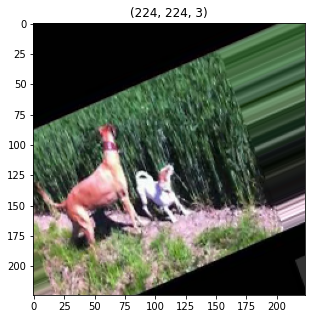

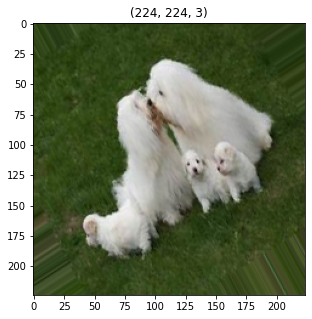

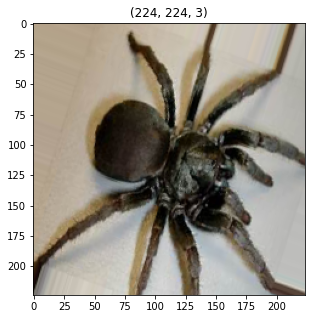

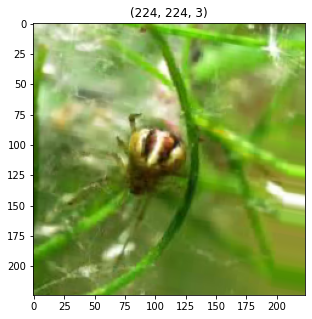

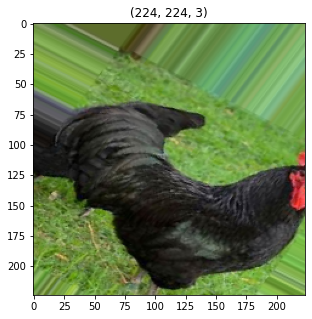

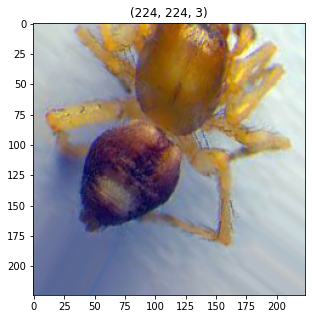

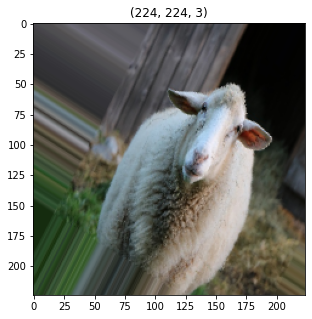

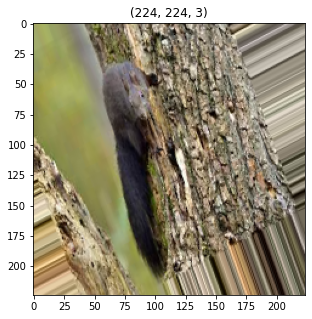

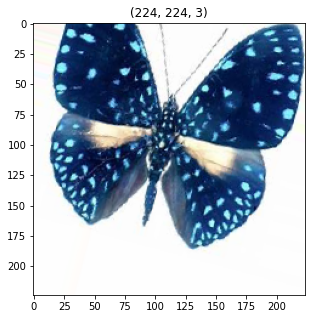

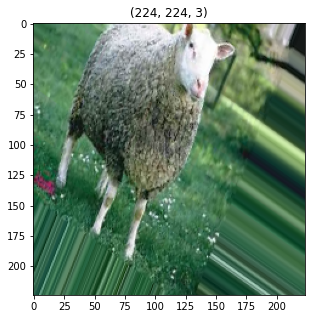

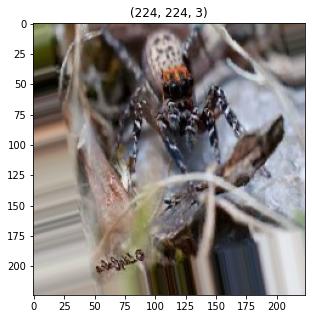

Validation


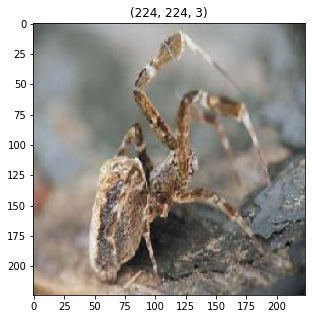

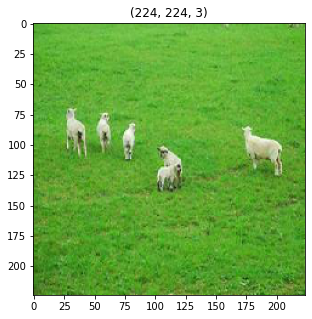

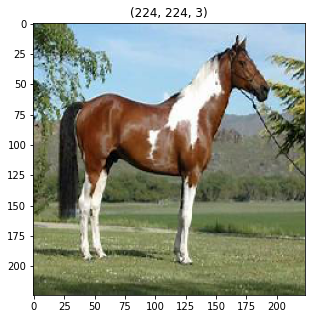

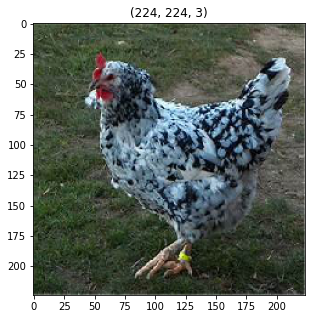

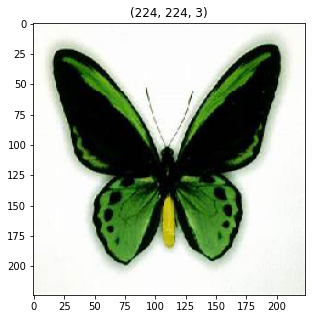

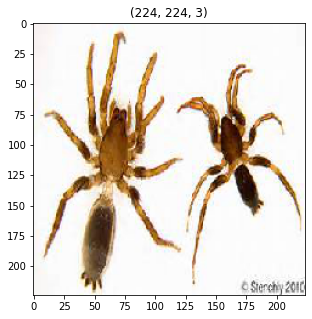

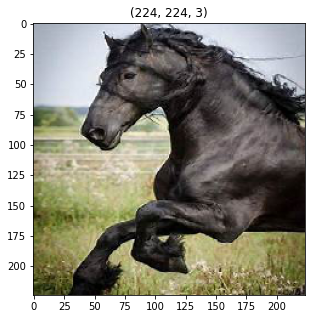

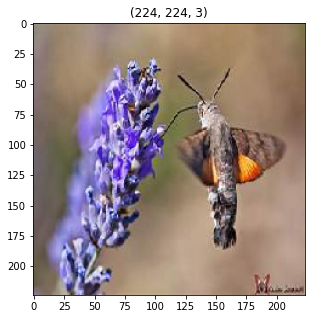

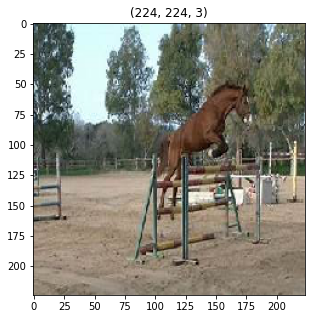

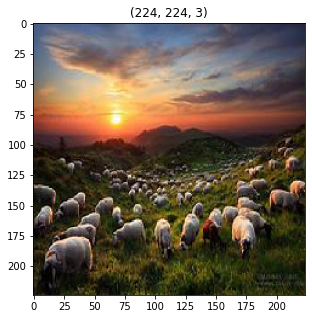

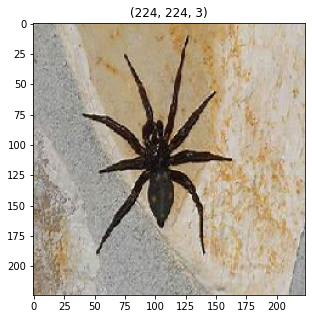

In [ ]:
t_img, labels = train_datas.next()
v_img, labels = validation_datas.next()

def plotImages(imgList, labels):
  for index, image in enumerate(imgList):

    if index <= 10:

      plt.figure(figsize=(5,5))
      plt.imshow(image)
      plt.title(image.shape)
      plt.axis = False
      plt.show()

print("train")
plotImages(t_img, labels)
print("Validation")
plotImages(v_img, labels)

In [ ]:
base_model = InceptionV3(input_shape=(224,224,3), include_top= False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras import optimizers

model = applications.VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

flat1 = tf.keras.layers.Flatten()(model.output)
dropout1 = Dropout(0.1)(flat1)
class1 = tf.keras.layers.Dense(256, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(class1)
output = tf.keras.layers.Dense(10, activation='softmax')(dropout2)
model = Model(inputs = model.inputs, outputs = output)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, verbose = 1, min_delta=0.0001, min_lr = 1e-8)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3, momentum=0.9), metrics = ['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Modeling 

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint(filepath= "best_model.5h",
                                   monitor="val_loss",
                                   mode = 'min',
                                   save_best_only=True)
early_stopping = EarlyStopping (monitor= "val_loss",
                                min_delta = 0.0001,
                                patience = 5,
                                verbose = 1)

keras_callbacks = [model_checkpoint, early_stopping]


In [ ]:
from keras import callbacks
history = model.fit(train_datas,
                    validation_data = validation_datas,
                    steps_per_epoch= 10,
                    epochs=30,
                    validation_steps = 10,
                    callbacks = keras_callbacks)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/10 [==============================] - 11s 1s/step - loss: 2.5231 - accuracy: 0.1312 - val_loss: 2.3272 - val_accuracy: 0.2000
Epoch 2/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 9s 914ms/step - loss: 2.3258 - accuracy: 0.1781 - val_loss: 2.1853 - val_accuracy: 0.1562
Epoch 3/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 10s 1s/step - loss: 2.1640 - accuracy: 0.1969 - val_loss: 1.8695 - val_accuracy: 0.3906
Epoch 4/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 10s 1s/step - loss: 1.9614 - accuracy: 0.3187 - val_loss: 1.6766 - val_accuracy: 0.4500
Epoch 5/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 9s 949ms/step - loss: 1.9528 - accuracy: 0.3500 - val_loss: 1.5333 - val_accuracy: 0.5188
Epoch 6/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 9s 955ms/step - loss: 1.7304 - accuracy: 0.4094 - val_loss: 1.2805 - val_accuracy: 0.5531
Epoch 7/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 707ms/step - loss: 1.5667 - accuracy: 0.4281 - val_loss: 1.2910 - val_accuracy: 0.5406
Epoch 8/30
10/10 [==============================] - 9s 913ms/step - loss: 1.3387 - accuracy: 0.5625 - val_loss: 1.0549 - val_accuracy: 0.6594
Epoch 9/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 685ms/step - loss: 1.1888 - accuracy: 0.6000 - val_loss: 1.0874 - val_accuracy: 0.6219
Epoch 10/30
10/10 [==============================] - 7s 690ms/step - loss: 1.4286 - accuracy: 0.4875 - val_loss: 1.1239 - val_accuracy: 0.6094
Epoch 11/30
10/10 [==============================] - 8s 760ms/step - loss: 1.2936 - accuracy: 0.5656 - val_loss: 1.1124 - val_accuracy: 0.6250
Epoch 12/30
10/10 [==============================] - 9s 929ms/step - loss: 1.0561 - accuracy: 0.6219 - val_loss: 0.8414 - val_accuracy: 0.7219
Epoch 13/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 10s 964ms/step - loss: 1.0665 - accuracy: 0.6406 - val_loss: 0.7701 - val_accuracy: 0.7406
Epoch 14/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 695ms/step - loss: 1.0581 - accuracy: 0.6438 - val_loss: 0.7745 - val_accuracy: 0.7219
Epoch 15/30
10/10 [==============================] - 7s 699ms/step - loss: 1.1453 - accuracy: 0.6219 - val_loss: 0.8023 - val_accuracy: 0.7281
Epoch 16/30
10/10 [==============================] - 7s 697ms/step - loss: 0.9359 - accuracy: 0.6875 - val_loss: 0.9143 - val_accuracy: 0.7094
Epoch 17/30
10/10 [==============================] - 9s 919ms/step - loss: 1.1164 - accuracy: 0.6156 - val_loss: 0.6961 - val_accuracy: 0.7656
Epoch 18/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 9s 937ms/step - loss: 0.9459 - accuracy: 0.6906 - val_loss: 0.6202 - val_accuracy: 0.8000
Epoch 19/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 694ms/step - loss: 0.8560 - accuracy: 0.7188 - val_loss: 0.6345 - val_accuracy: 0.8094
Epoch 20/30
10/10 [==============================] - 8s 755ms/step - loss: 0.9794 - accuracy: 0.6656 - val_loss: 0.7168 - val_accuracy: 0.7500
Epoch 21/30
10/10 [==============================] - 9s 961ms/step - loss: 0.9084 - accuracy: 0.6844 - val_loss: 0.5586 - val_accuracy: 0.8062
Epoch 22/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 7s 695ms/step - loss: 0.9474 - accuracy: 0.6531 - val_loss: 0.5952 - val_accuracy: 0.7812
Epoch 23/30
10/10 [==============================] - 7s 691ms/step - loss: 0.9685 - accuracy: 0.6594 - val_loss: 0.7526 - val_accuracy: 0.7250
Epoch 24/30
10/10 [==============================] - 7s 726ms/step - loss: 0.7453 - accuracy: 0.7188 - val_loss: 0.6061 - val_accuracy: 0.8062
Epoch 25/30
10/10 [==============================] - 7s 706ms/step - loss: 0.7389 - accuracy: 0.7469 - val_loss: 0.6687 - val_accuracy: 0.7781
Epoch 26/30
10/10 [==============================] - 9s 930ms/step - loss: 0.7880 - accuracy: 0.7125 - val_loss: 0.5085 - val_accuracy: 0.8438
Epoch 27/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 10s 996ms/step - loss: 0.8839 - accuracy: 0.7094 - val_loss: 0.5050 - val_accuracy: 0.8031
Epoch 28/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 9s 926ms/step - loss: 0.7939 - accuracy: 0.7531 - val_loss: 0.4907 - val_accuracy: 0.8313
Epoch 29/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 8s 770ms/step - loss: 0.5969 - accuracy: 0.7875 - val_loss: 0.5374 - val_accuracy: 0.8219
Epoch 30/30
10/10 [==============================] - 7s 700ms/step - loss: 0.6112 - accuracy: 0.7812 - val_loss: 0.9011 - val_accuracy: 0.6906


In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.5h")

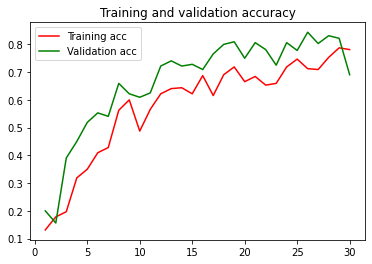

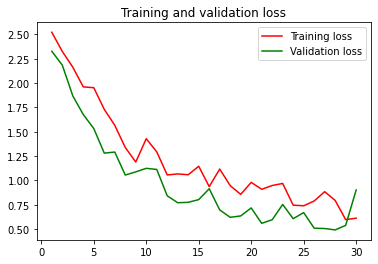

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()